In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np 

In [2]:
with open("../data/nietzsche.txt", "r", encoding="utf8") as f:
    text = f.read().lower()

print(len(text))

600901


In [3]:
lines = text.split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
num_words = len(tokenizer.word_index) + 1

In [4]:
print(lines[3])
tokenizer.texts_to_sequences([lines[3]])[0]

supposing that truth is a woman--what then? is there not ground


[573, 8, 116, 6, 7, 145, 40, 141, 6, 39, 14, 1014]

In [5]:
input_sequences = []

for line in lines:
    tokens = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(tokens)):
		input_sequences.append(tokens[:i+1])

In [6]:
input_sequences[0]

[573, 8]

In [7]:
max_sequence_len = max([len(i) for i in input_sequences])

In [8]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [9]:
np.random.shuffle(input_sequences)
X, y = input_sequences[:,:-1], np.expand_dims(input_sequences[:,-1], axis=1)

In [10]:
X.shape

(92321, 16)

In [11]:
y.shape

(92321, 1)

In [12]:
num_words

10262

In [13]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

emb_size = 256

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, emb_size, input_length=max_sequence_len - 1),
    tf.keras.layers.LSTM(120),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(units=num_words, activation='softmax')
]) 

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 256)           2627072   
_________________________________________________________________
lstm (LSTM)                  (None, 120)               180960    
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               30976     
_________________________________________________________________
dense_1 (Dense)              (None, 10262)             2637334   
Total params: 5,476,342
Trainable params: 5,476,342
Non-trainable params: 0
_________________________________________________________________


In [14]:
plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [15]:
callback = EarlyStopping(monitor="loss", patience=3)
history = model.fit(X, y, epochs=50, batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/50
722/722 [==============================] - 31s 38ms/step - loss: 6.9518 - accuracy: 0.0677
Epoch 2/50
722/722 [==============================] - 27s 37ms/step - loss: 6.0759 - accuracy: 0.1156
Epoch 3/50
722/722 [==============================] - 26s 36ms/step - loss: 5.7679 - accuracy: 0.1404
Epoch 4/50
722/722 [==============================] - 26s 36ms/step - loss: 5.4997 - accuracy: 0.1555
Epoch 5/50
722/722 [==============================] - 26s 36ms/step - loss: 5.2489 - accuracy: 0.1712
Epoch 6/50
722/722 [==============================] - 26s 36ms/step - loss: 5.0247 - accuracy: 0.1817
Epoch 7/50
722/722 [==============================] - 26s 36ms/step - loss: 4.7605 - accuracy: 0.2002
Epoch 8/50
722/722 [==============================] - 25s 35ms/step - loss: 4.4843 - accuracy: 0.2175
Epoch 9/50
722/722 [==============================] - 25s 34ms/step - loss: 4.1977 - accuracy: 0.2415
Epoch 10/50
722/722 [==============================] - 25s 34ms/step - loss: 3.926

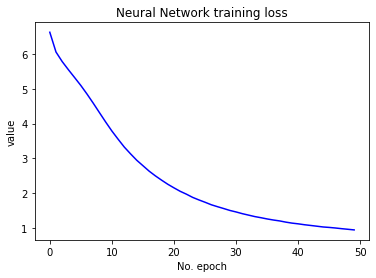

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='(training data)',color='blue')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

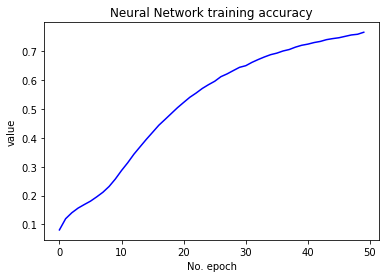

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='(training data)',color='blue')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [18]:
import sys

text = "The philosophy of the dogmatists, it is to be hoped, was only a promise for thousands of years afterwards"
next_words = 100

print(text)
for _ in range(next_words):
    tokens = tokenizer.texts_to_sequences([text])[0]
    tokens = pad_sequences([tokens], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(tokens, verbose=0), axis=-1)
 
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    sys.stdout.write(output_word + " ")
    text += " " + output_word

The philosophy of the dogmatists, it is to be hoped, was only a promise for thousands of years afterwards
as was cold so proud of it connected with the intimidation of others who has the feet of a wind which a will a future such a man should be a possibility to anything itself as i do so perhaps my very good and to it should be a question for woman for the mask the instance only a thing with it not an individual frittered away or something duty a duty there is have an involuntary and ready pains to our power and virtues of thought it will to be the philosophers for the sake of the one who 